In [1]:
import torch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import time
import torch.nn.functional as F
import torch.optim as optim



In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data=train_data.drop(['station','From Date', 'To Date','PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],axis=1)
test_data=test_data.drop(['station','From Date', 'To Date','PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],axis=1)
train_data.head(2)
test_data.head(2)

,time,PM2.5,latitude,longitude
0,2022-01-01 00:30:00,242.00,28.498571,77.26484
1,2022-01-01 01:30:00,254.75,28.498571,77.26484


In [3]:
missing_values = train_data.isnull().sum()
#print(missing_values)
missing_percent = (train_data.isnull().sum() / len(train_data)) * 100
#print(missing_percent)
median_PM=train_data['PM2.5'].median()
train_data['PM2.5']= train_data['PM2.5'].fillna(median_PM)
train_data['time'] = pd.to_datetime(train_data['time'])
train_data['Year'] = train_data['time'].dt.year
train_data['Month'] = train_data['time'].dt.month
train_data['Day'] = train_data['time'].dt.day
train_data['Hour'] = train_data['time'].dt.hour
train_data['Minute'] = train_data['time'].dt.minute
train_data['Second'] = train_data['time'].dt.second
train_data=train_data.drop(['time'],axis=1)
train_data['total_hour']=train_data['Year']*365*24*60+train_data['Month']*30*24*60+train_data['Day']*24*60+train_data['Minute']
missing_percent = (test_data.isnull().sum() / len(test_data)) * 100
#print(missing_percent)
median_PM= test_data['PM2.5'].median()
test_data['PM2.5']= test_data['PM2.5'].fillna(median_PM)
test_data['time'] = pd.to_datetime(test_data['time'])
test_data['Year'] = test_data['time'].dt.year
test_data['Month'] = test_data['time'].dt.month
test_data['Day'] = test_data['time'].dt.day
test_data['Hour'] = test_data['time'].dt.hour
test_data['Minute'] = test_data['time'].dt.minute
test_data['Second'] = test_data['time'].dt.second
test_data=test_data.drop(['time'],axis=1)
test_data['total_hour']=test_data['Year']*365*24*60+test_data['Month']*24*60+test_data['Day']*24*60+test_data['Minute']
train_data.head(2)
test_data.head(2)

,PM2.5,latitude,longitude,Year,Month,Day,Hour,Minute,Second,total_hour
0,242.00,28.498571,77.26484,2022,1,1,0,30,0,1062766110
1,254.75,28.498571,77.26484,2022,1,1,1,30,0,1062766110


In [4]:
X_train = torch.tensor(train_data.drop(['PM2.5','total_hour'],axis=1).values).float()
y_train = torch.tensor(train_data['PM2.5'].values).float()
X_test = torch.tensor(test_data.drop(['PM2.5','total_hour'],axis=1).values).float()
y_test = torch.tensor(test_data['PM2.5'].values).float()
print(X_train.shape[1])

8


Epoch [1/100], Loss: 50771.0078
Epoch [1/100], val Loss: 47038.8203
Epoch [11/100], Loss: 15249.8721
Epoch [11/100], val Loss: 11839.4307
Epoch [21/100], Loss: 7270.1709
Epoch [21/100], val Loss: 7157.5815
Epoch [31/100], Loss: 3173.8115
Epoch [31/100], val Loss: 3521.7253
Epoch [41/100], Loss: 2246.8008
Epoch [41/100], val Loss: 2069.9946
Epoch [51/100], Loss: 946.1525
Epoch [51/100], val Loss: 1081.6323
Epoch [61/100], Loss: 1004.5018
Epoch [61/100], val Loss: 925.3271
Epoch [71/100], Loss: 927.3514
Epoch [71/100], val Loss: 906.7039
Epoch [81/100], Loss: 885.3324
Epoch [81/100], val Loss: 895.6573
Epoch [91/100], Loss: 868.5247
Epoch [91/100], val Loss: 864.3107


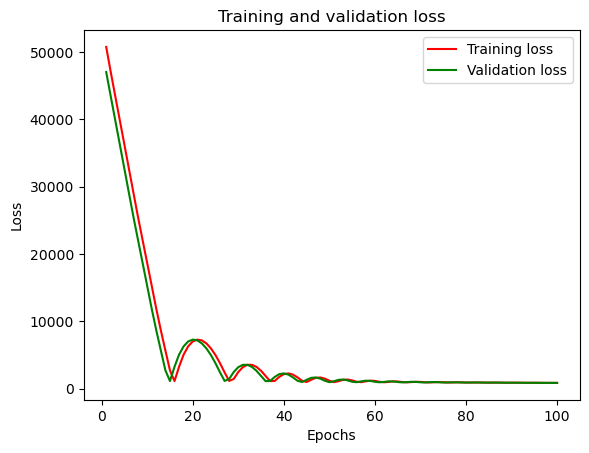

Test loss: 832.5598754882812


In [5]:

def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2))

input_dim = 8
output_dim = 1

# Define the weight and bias tensors
w1 = torch.randn(input_dim, 64, requires_grad=True)
b1 = torch.randn(64, requires_grad=True)
w2 = torch.randn(64, 32, requires_grad=True)
b2 = torch.randn(32, requires_grad=True)
w3 = torch.randn(32, 16, requires_grad=True)
b3 = torch.randn(16, requires_grad=True)
w4 = torch.randn(16, output_dim, requires_grad=True)
b4 = torch.randn(output_dim, requires_grad=True)

#model architecture
def model(x):
    x = torch.matmul(x, w1) + b1
    x = F.relu(x)
    x = torch.matmul(x, w2) + b2
    x = F.relu(x)
    x = torch.matmul(x, w3) + b3
    x = F.relu(x)
    x = torch.matmul(x, w4) + b4
    return x

# Define the optimizer
opti = optim.Adam([w1, b1, w2, b2, w3, b3, w4, b4], lr=0.001)

# Train the model
train_losses, val_losses = [], []
for epoch in range(100):
    opti.zero_grad()
    outputs = model(X_train)
    loss = RMSELoss(outputs, y_train)
    loss.backward()
    opti.step()
    train_losses.append(loss.item())
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = RMSELoss(val_outputs, y_test)
        val_losses.append(val_loss.item())
    if epoch % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
        print('Epoch [{}/{}], val Loss: {:.4f}'.format(epoch+1, 100, val_loss.item()))

# Plot the training and validation losses
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'red', label='Training loss')
plt.plot(epochs, val_losses, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = RMSELoss(test_outputs, y_test)
print('Test loss:', test_loss.item())
